In [64]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LeakyReLU, Conv1D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pydotplus
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydotplus

import ehtim as eh
import numpy as np

# visibilities
INPUT_SIZE = 1030
# pixels in image
OUTPUT_SIZE = 784

In [5]:
IM = eh.image.load_txt('../models/avery_sgra_eofn.txt');
IM = IM.resample_square(28)

def displayImage(arr):
    """Displays image given a flattened array of pixels."""
    IM.imvec = arr
    IM.display()

Loading text image:  ../models/avery_sgra_eofn.txt


In [10]:
def getData(start, end):
    """Reads in visibilities and image from [start, end)."""
    n = end - start
    x, y = np.empty([n, INPUT_SIZE]), np.empty([n, OUTPUT_SIZE])
    for i in range(n):
        obs = eh.obsdata.load_uvfits('inputs/obs{0}.fits'.format(start + i))
        im = eh.image.load_fits('outputs/img{0}.fits'.format(start + i))
        x[i] = obs.data['vis']
        y[i] = im.imvec
    return x, y

In [ ]:
%%capture
x_train, y_train = getData(10000, 18000)

In [ ]:
# save so don't have to reload every time
np.save('x_10000-18000.npy', x_train)
np.save('y_10000-18000.npy', y_train)

In [36]:
x_1 = np.load('x_0-10000.npy')
y_1 = np.load('y_0-10000.npy')
x_2 = np.load('x_10000-18000.npy')
y_2 = np.load('y_10000-18000.npy')
x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))
x_0 = x.copy()
x = np.expand_dims(x, axis=2)
y = y * 784
print(x.shape)

(18000, 1030, 1)


In [ ]:
# Neural Net
print(x.shape)
filters = 16
kernel_size = 100
model = Sequential()
model.add(Conv1D(filters, kernel_size, input_shape=(INPUT_SIZE, 1), activation='relu'))
#model.add(Dense(800))
model.add(Flatten())
model.add(Dense(OUTPUT_SIZE))
model.compile(loss='mse', optimizer='nadam')
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
history = model.fit(x, y, epochs=50, batch_size=248, validation_split=0.3, callbacks = [es])

(18000, 1030, 1)
Train on 12600 samples, validate on 5400 samples
Epoch 1/50
12600/12600 [==============================] - 48s 4ms/step - loss: 1.0597 - val_loss: 0.7589
Epoch 2/50
12600/12600 [==============================] - 50s 4ms/step - loss: 0.7106 - val_loss: 0.6375
Epoch 3/50
12600/12600 [==============================] - 49s 4ms/step - loss: 0.6159 - val_loss: 0.5713
Epoch 4/50
12600/12600 [==============================] - 50s 4ms/step - loss: 0.5732 - val_loss: 0.5422
Epoch 5/50
12600/12600 [==============================] - 49s 4ms/step - loss: 0.5356 - val_loss: 0.5788
Epoch 6/50
12600/12600 [==============================] - 42s 3ms/step - loss: 0.5178 - val_loss: 0.5218
Epoch 7/50
12600/12600 [==============================] - 46s 4ms/step - loss: 0.5005 - val_loss: 0.5102
Epoch 8/50
12600/12600 [==============================] - 46s 4ms/step - loss: 0.4878 - val_loss: 0.4976
Epoch 9/50
12600/12600 [==============================] - 48s 4ms/step - loss: 0.4763 - val_lo

In [60]:
plot_model(model, to_file='model.png', show_shapes=True)

TypeError: plot_model() got an unexpected keyword argument 'expand_nested'

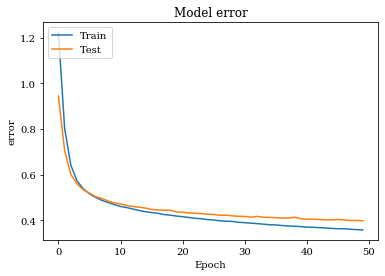

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Loading uvfits:  inputs/obs18035.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img18035.fits
Loading uvfits:  inputs/obs18036.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img18036.fits
Loading uvfits:  inputs/obs18037.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img18037.fits
Loading uvfits:  inputs/obs18038.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img18038.fits
Loading uvfits:  inputs/obs18039.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img18039.fits
Loading uvfits:  inputs/obs18040.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img18040.fits
Load

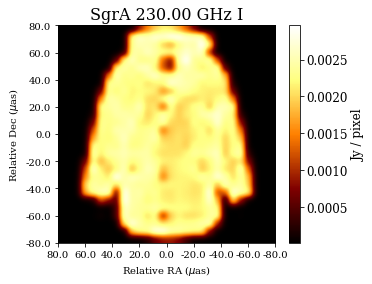

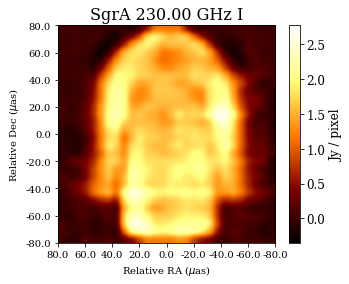

1


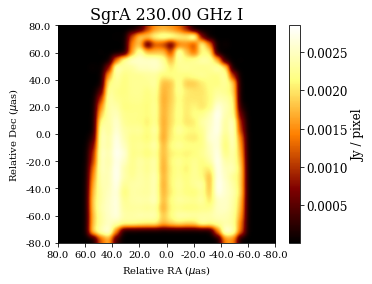

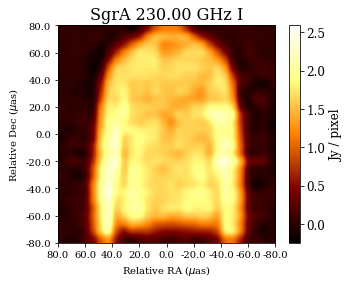

2


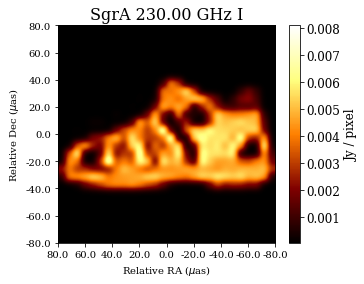

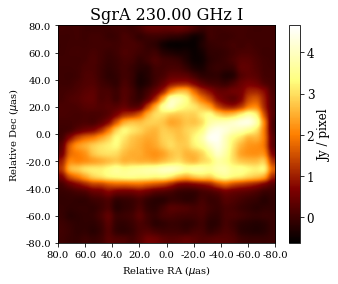

3


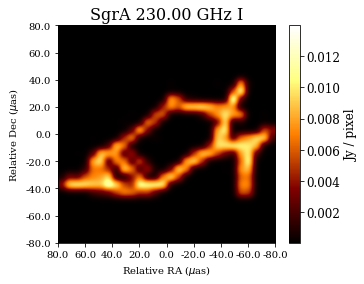

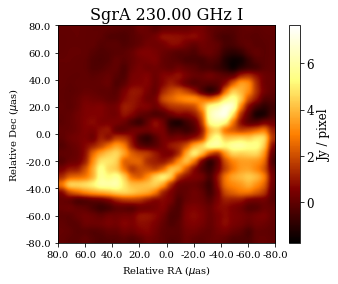

4


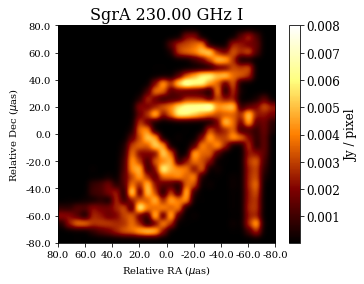

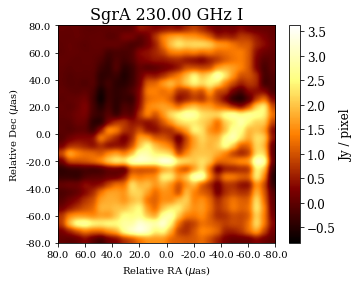

5


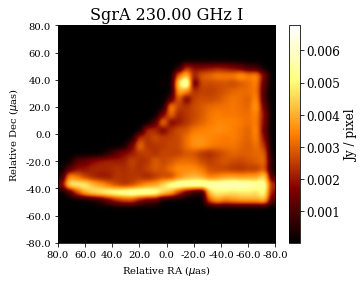

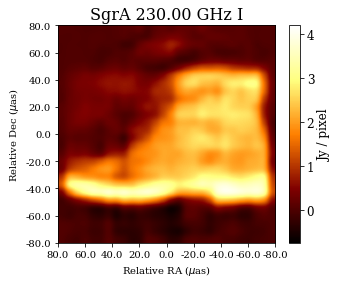

6


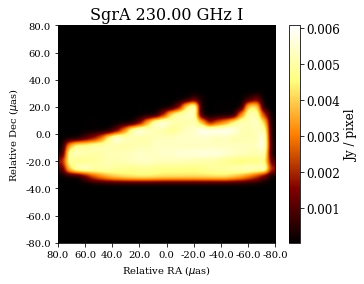

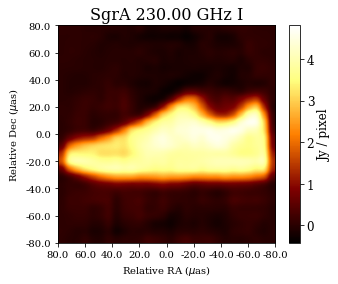

7


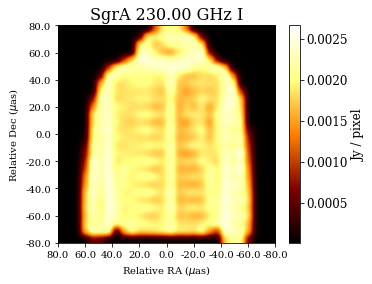

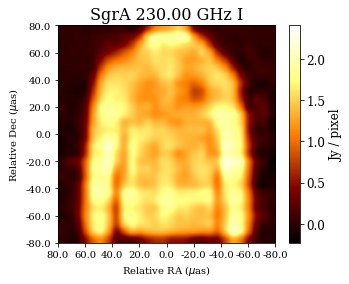

8


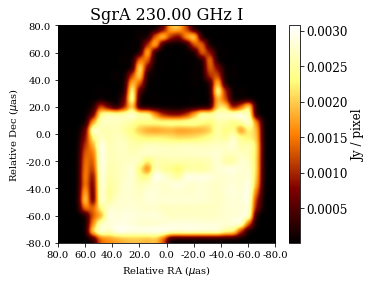

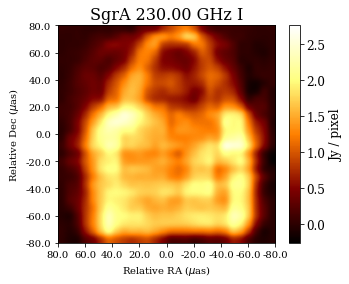

9


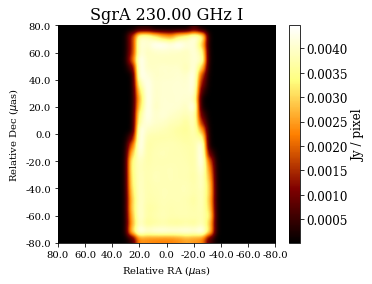

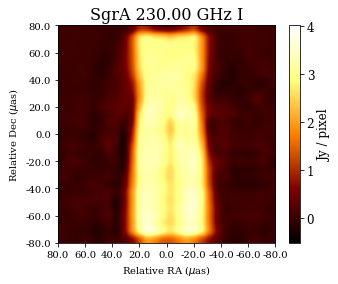

In [67]:
# Visualize predictions vs actual
x_test, y_test = getData(18035, 18045)
x_test = np.expand_dims(x_test, axis=2)
y_predict = model.predict(x_test)
for i in range(10):
    print(i)
    displayImage(y_test[i])
    displayImage(y_predict[i])